## Square well bound states

Let the potential be $-V_0$ between $x = -a$ and $x = a$ and zero elsewhere. 

Natural length scale, $l_0 = 2a$

$x = l_0y$ and $V = E_0 U(y)$

$$E_0 = \frac{\hbar^2}{2ml_0^2} = \frac{\hbar^2}{8ma^2}$$ 
And
$$U(y) = \begin{cases}
\frac{-V_0}{E_0} & |y| \leq \frac{1}{2} \\
0 & |y| > \frac{1}{2}
\end{cases}$$

### Comparison with infinite square well 
For particle in a box with ground potential at $V_g$ (can be +ve or -ve) we have the following energy eigenvalues:
$$E-V_g = \frac{n^2\pi^2\hbar^2}{2ml_0^2} = n^2\pi^2E_0$$

$$\frac{E-V_g}{E_0} = n^2\pi^2$$
Since $E/E_0 = e$ the dimensionless energy eigenvalues in our program and $V_g/E_0$ = $U(y)$ we have
$$e = n^2\pi^2 + U(y) = n^2\pi^2 - V_0$$ 
Since $U(y) = -V_0$ in the finite square well

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as alg
plt.style.use('seaborn-whitegrid')



In [2]:
def Energies(V0):
    ns = np.arange(1,10,1)
    es = (ns**2)*np.pi**2 -V0
    return es
    

In [3]:
def kro(i,j):
    return 1 if i==j else 0

def U(ys,i):
    return -Umax if abs(ys[i])<=0.5 else 0 # 

def H_ele(i,j,dy,ys): 
    return (-kro(i+1,j) + 2*kro(i,j) -kro(i-1,j))/dy**2  + U(ys,i)*kro(i,j)

In [4]:
dy = 0.01 # discretization of space
y_lim = 5.0 # yspace half-width
Umax = 10.0 # also equal to V0

ys = np.arange(-y_lim,y_lim,dy) # space points
N = len(ys)
print(N)
H = [[H_ele(i,j,dy,ys) for i in range(N)] for j in range(N)] # Hamiltonian N*N matrix
#print(H)

1000


In [5]:
H_eigs, H_eigvs = alg.eig(H)
H_eigvalues = np.sort(H_eigs) # sorted eigenvalues
H_eigvectors = [] # to hold sorted eigenvectors

# loop to arrange eigenvectors in corresponding order of sorted eigenvalues #
for i in range(N):
    for j in range(N):
        if H_eigs[j] == H_eigvalues[i]:
            H_eigvectors.append(H_eigvs[:,j])
            continue

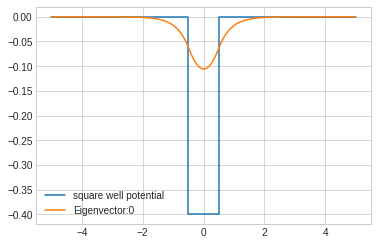

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot([-y_lim,-0.5,-0.5,0.5,0.5,y_lim],[0,0,-0.4,-0.4,0,0],label = 'square well potential')
for i in range(0,1):
    ax.plot(ys,H_eigvectors[i],label = 'Eigenvector:%d'%i)
ax.legend()

In [7]:
psi = H_eigvectors[0]
psi1 = H_eigvectors[1]
np.dot(psi.conj().T, psi1)

-8.79611780463897e-14

In [8]:
print(H_eigvalues[0:9])

for i in range(len(H_eigvalues)):
    if H_eigvalues[i]<=0 and H_eigvalues[i+1]>=0:
        neg = i
        break
    else:
        continue

[-6.49053107  0.09496287  0.48310431  0.96806685  1.90678894  2.7112986
  4.21518445  5.32041743  7.3518301 ]


In [9]:
E_infwell = Energies(Umax)
print(E_infwell)

[-1.30395599e-01  2.94784176e+01  7.88264396e+01  1.47913670e+02
  2.36740110e+02  3.45305758e+02  4.73610616e+02  6.21654682e+02
  7.89437956e+02]


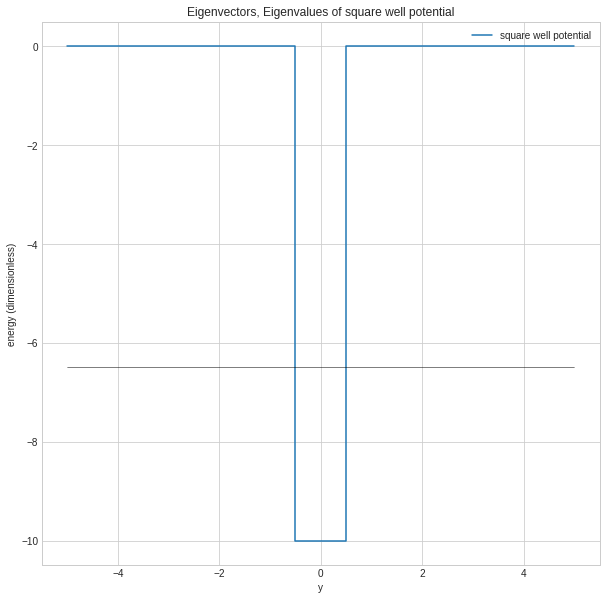

In [10]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
ax.plot([-y_lim,-0.5,-0.5,0.5,0.5,y_lim],[0,0,-Umax,-Umax,0,0],label = 'square well potential')
for i in range(0,neg+1):
    #ax.plot(ys,H_eigvectors[i],label = 'Eigenvector:%d'%i)
    ax.plot([-y_lim, y_lim],[H_eigvalues[i],H_eigvalues[i]],color = 'black',linewidth = 0.5)
ax.set(xlabel = 'y', ylabel = 'energy (dimensionless)', title = 'Eigenvectors, Eigenvalues of square well potential')
ax.legend()  

### Transcendental solution

(-0.4, 4.0)

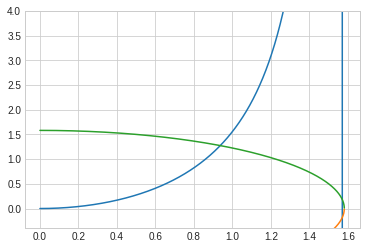

In [11]:
%matplotlib inline

z0 = np.sqrt(Umax/4)
etas = np.arange(0,z0,0.0001)
zis = etas*np.tan(etas)

zis_circ = np.sqrt(z0**2-etas**2)
zis_circ2 = -np.sqrt(z0**2-etas**2)

plt.plot(etas,zis)
plt.plot(etas,zis_circ2)
plt.plot(etas,zis_circ)
plt.ylim(-0.4,4)
#plt.axis('equal')

In [12]:
b1 = (1.26746**2 * 4)
print(b1)
b2 = (0.184127**2 * 4)
print(b2)

6.4258194064000005
0.13561100851600003
